In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
lats = np.random.uniform(low=-90.000, high=90.000, size=50)
lngs = np.random.uniform(low=-180.000, high=180.000, size=50)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
coordinates = list(lat_lngs)

In [5]:
from citipy import citipy

In [6]:
cities = []

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    if city not in cities:
        cities.append(city)
len(cities)

47

In [7]:
import requests
from config import weather_api_key

In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
import time
from datetime import datetime

In [10]:
city_data = []

# print the beginning of the logging
print("Beginning of Data Retrieval       ")
print("----------------------------------")

# create counters
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning of Data Retrieval       
----------------------------------
Processing Record 1 of Set 1 | torbay
Processing Record 2 of Set 1 | kapaa
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | puerto ayacucho
Processing Record 5 of Set 1 | geraldton
Processing Record 6 of Set 1 | lavrentiya
Processing Record 7 of Set 1 | togur
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | soimari
Processing Record 10 of Set 1 | provideniya
Processing Record 11 of Set 1 | luderitz
Processing Record 12 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 13 of Set 1 | souillac
Processing Record 14 of Set 1 | bluff
Processing Record 15 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 16 of Set 1 | pozo colorado
Processing Record 17 of Set 1 | kodiak
Processing Record 18 of Set 1 | east london
Processing Record 19 of Set 1 | taltal
Processing Record 20 of Set 1 | kalabo
Processing Record 21 of Set 1 | khatanga
Proces

In [14]:
city_weather['weather'][0]['description']

'overcast clouds'

In [10]:
len(city_data)

572

In [14]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tadine,-21.5500,167.8833,75.15,84,63,9.17,NC,2021-11-18 15:25:56
1,Albany,42.6001,-73.9662,63.18,82,74,4.00,US,2021-11-18 15:22:54
2,New Norfolk,-42.7826,147.0587,50.76,84,91,2.55,AU,2021-11-18 15:25:57
3,Sola,-13.8833,167.5500,80.76,73,8,7.52,VU,2021-11-18 15:25:57
4,Fukue,32.6881,128.8419,61.68,48,3,10.11,JP,2021-11-18 15:25:57
5,Carnarvon,-24.8667,113.6333,69.87,73,40,19.57,AU,2021-11-18 15:25:58
6,Eydhafushi,5.1033,73.0708,82.38,76,100,18.66,MV,2021-11-18 15:25:58
7,Winnemucca,40.9730,-117.7357,26.65,74,1,0.00,US,2021-11-18 15:25:58
8,Sitka,57.0531,-135.3300,39.09,60,90,16.11,US,2021-11-18 15:25:59
9,Kaitangata,-46.2817,169.8464,43.79,95,40,4.70,NZ,2021-11-18 15:25:59


In [15]:
new_col_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [16]:
city_data_df = city_data_df[new_col_order]

In [17]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tadine,NC,2021-11-18 15:25:56,-21.5500,167.8833,75.15,84,63,9.17
1,Albany,US,2021-11-18 15:22:54,42.6001,-73.9662,63.18,82,74,4.00
2,New Norfolk,AU,2021-11-18 15:25:57,-42.7826,147.0587,50.76,84,91,2.55
3,Sola,VU,2021-11-18 15:25:57,-13.8833,167.5500,80.76,73,8,7.52
4,Fukue,JP,2021-11-18 15:25:57,32.6881,128.8419,61.68,48,3,10.11
5,Carnarvon,AU,2021-11-18 15:25:58,-24.8667,113.6333,69.87,73,40,19.57
6,Eydhafushi,MV,2021-11-18 15:25:58,5.1033,73.0708,82.38,76,100,18.66
7,Winnemucca,US,2021-11-18 15:25:58,40.9730,-117.7357,26.65,74,1,0.00
8,Sitka,US,2021-11-18 15:25:59,57.0531,-135.3300,39.09,60,90,16.11
9,Kaitangata,NZ,2021-11-18 15:25:59,-46.2817,169.8464,43.79,95,40,4.70


In [18]:
# create output file

output_data_file = "weather_data/cities.csv"
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [19]:
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

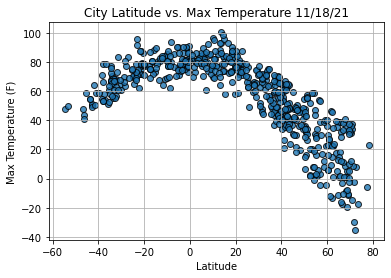

In [20]:
import time

plt.scatter(lats, max_temps, edgecolor = "black", linewidths = 1, marker = "o", alpha = 0.8, label = "Cities")

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig1.png")

plt.show()

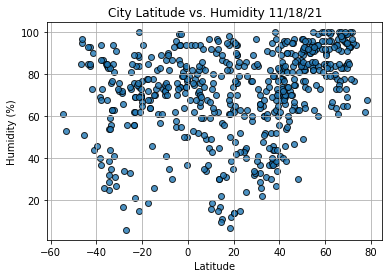

In [21]:
plt.scatter(lats, humidity, edgecolor = "black", linewidths = 1, marker = "o", alpha = 0.8, label = "Cities")

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig2.png")

plt.show()

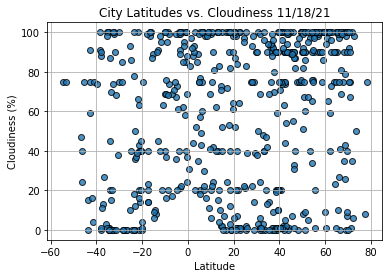

In [22]:
plt.scatter(lats, cloudiness, edgecolor = "black", linewidths = 1, marker = "o", alpha = 0.8, label = "Cities")

plt.title(f"City Latitudes vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig3.png")

plt.show()

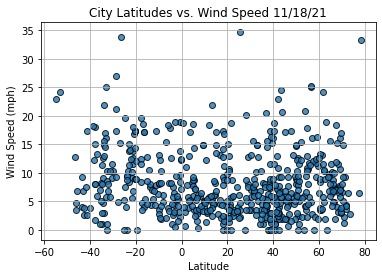

In [23]:
plt.scatter(lats, wind_speed, edgecolor = "black", linewidths = 1, marker = "o", alpha = 0.8, label = "Cities")

plt.title(f"City Latitudes vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig4.png")

plt.show()

In [68]:
from scipy.stats import linregress
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    plt.annotate(line_eq, text_coordinates, fontsize = 15, color = 'red')
    plt.title(title)
    plt.ylabel(y_label)
    plt.xlabel("Latitude")
    plt.show()
    

In [27]:
index13 = city_data_df.loc[13]
index13

City                      Emerald
Country                        AU
Date          2021-11-18 15:26:00
Lat                      -23.5333
Lng                      148.1667
Max Temp                    71.74
Humidity                       62
Cloudiness                      0
Wind Speed                  10.36
Name: 13, dtype: object

In [28]:
city_data_df["Lat"] >=0

0      False
1       True
2      False
3      False
4       True
       ...  
567     True
568     True
569     True
570     True
571    False
Name: Lat, Length: 572, dtype: bool

In [36]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >=0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

In [37]:
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Albany,US,2021-11-18 15:22:54,42.6001,-73.9662,63.18,82,74,4.00
4,Fukue,JP,2021-11-18 15:25:57,32.6881,128.8419,61.68,48,3,10.11
6,Eydhafushi,MV,2021-11-18 15:25:58,5.1033,73.0708,82.38,76,100,18.66
7,Winnemucca,US,2021-11-18 15:25:58,40.9730,-117.7357,26.65,74,1,0.00
8,Sitka,US,2021-11-18 15:25:59,57.0531,-135.3300,39.09,60,90,16.11


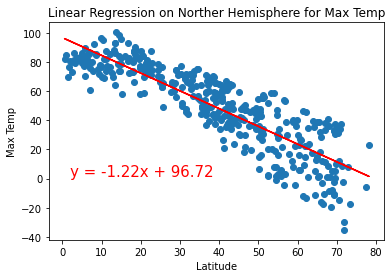

In [69]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, "Linear Regression on Norther Hemisphere for Max Temp", "Max Temp", (2,2))

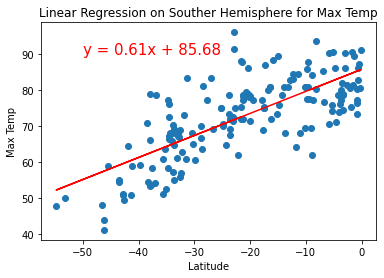

In [70]:
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Linear Regression on Souther Hemisphere for Max Temp", "Max Temp", (-50, 90))

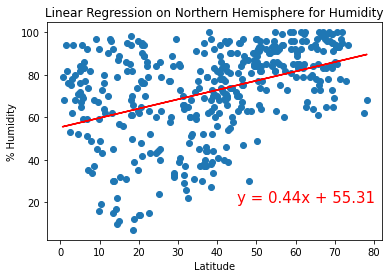

In [71]:
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Linear Regression on Northern Hemisphere for Humidity", "% Humidity", (45, 20))

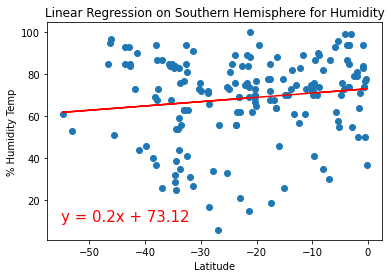

In [72]:
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Linear Regression on Southern Hemisphere for Humidity", "% Humidity Temp", (-55, 10))

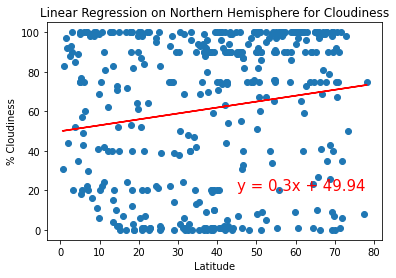

In [73]:
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Linear Regression on Northern Hemisphere for Cloudiness", "% Cloudiness", (45, 20))

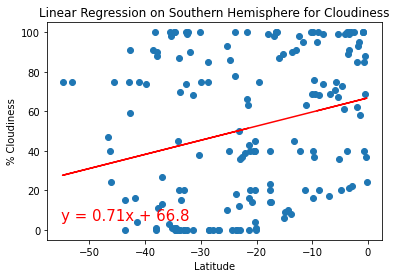

In [74]:
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Linear Regression on Southern Hemisphere for Cloudiness", "% Cloudiness", (-55, 5))

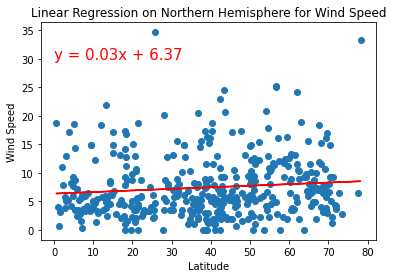

In [75]:
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Linear Regression on Northern Hemisphere for Wind Speed", "Wind Speed", (0, 30))

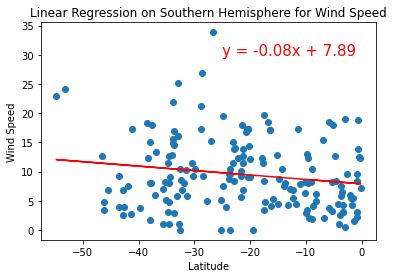

In [78]:
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Linear Regression on Southern Hemisphere for Wind Speed", "Wind Speed", (-25, 30))